In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import PassiveAggressiveRegressor

# Robust regression is interested in fitting a regression model in the presence of corrupt data: 
# either outliers, or error in the model.
# Scikit-learn provides 3 robust regression estimators: RANSAC, Theil Sen and HuberRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor

# TO BE WORKED ON : Polynomial regression: extending linear models with basis functions

from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.svm import NuSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
#from xgboost.sklearn import XGBRegressor
#from lightgbm import LGBMRegressor
#from catboost import CatBoostRegressor

from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

D:\Anaconda3\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
def getRegressors():
    Regressors = []
    RegList=[]
    # 0
    Linear = LinearRegression()
    Regressors.append(Linear)
    RegList.append('Linear')

    #XGBR = XGBRegressor()
    #Regressors.append(XGBR)

    # 1
    RandomForest = RandomForestRegressor(max_depth=3,min_samples_leaf=10, min_samples_split=15,
     n_estimators=50)
    Regressors.append(RandomForest)
    RegList.append('RF')

    # 11
    #LGBMR = LGBMRegressor()
    #Regressors.append(LGBMR)


    # 2
    ExtraTrees = ExtraTreesRegressor(n_estimators=10,min_samples_leaf=10, min_samples_split=10, random_state=0)
    Regressors.append(ExtraTrees)
    RegList.append('ExtraTrees')

    # 3
    GradientBoosting = GradientBoostingRegressor()
    Regressors.append(GradientBoosting)
    RegList.append('GradBoost')

    # 1
    #lars=Lars()
    #Regressors.append(lars)

    # 4
    lasso = Lasso()
    Regressors.append(lasso)
    RegList.append('Lasso')

    # 5
    elasticNet = ElasticNet()
    Regressors.append(elasticNet)
    RegList.append('E-net')

    # 6
    ridge = Ridge()
    Regressors.append(ridge)
    RegList.append('Ridge')

    #CatBoost = CatBoostRegressor(verbose=0)
    #Regressors.append(CatBoost)

  

    # 7
    AdaBoost = AdaBoostRegressor()
    Regressors.append(AdaBoost)
    RegList.append('Adaboost')
 
    # 8
    KNeighbors = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')
    Regressors.append(KNeighbors)
    RegList.append('KNN')

    # 25
    #SGD = SGDRegressor()
    #Regressors.append(SGD)

  
    return Regressors,RegList

def predictAll(Regressors, X_train, y_train, X_test,y_test,RegList):

    predictions=[]
    cvscores=[]
    models =[]
    fitted_model=[]
    y_train= y_train.ravel()
    for regressor in Regressors:
        model_name = type(regressor).__name__
        models.append(model_name)
        print(' Model', model_name)
        regressor.fit(X_train,y_train)
        fitted_model.append(regressor)
        prediction = regressor.predict(X_test)
        predictions.append(np.round(prediction))

        score = cross_val_score(regressor,X_train, y_train,cv=5,scoring="neg_mean_squared_error")
        meanscore=score.mean()
        cvscores.append(np.sqrt(-meanscore))
        #print('CV Score',score,meanscore, np.sqrt(-meanscore))
    
    RMS=[]
    R2=[]
    scr=pd.DataFrame( columns = RegList)
    i=0
    for prediction in predictions:
        msscore = mean_squared_error(y_test, prediction)
        r2=r2_score(y_test, prediction)
        rms = sqrt(msscore)
        RMS.append(rms)
        R2.append(r2)
        scr.iloc[:,i]=np.round(prediction,0)
        i=i+1

    #scr.index=X_test.ravel()
    scr=scr.sort_index()

    compare = pd.DataFrame(list(zip(models,RMS,R2,cvscores)), columns=['Model','RMS','R2','CV'])
    return scr, fitted_model, compare.sort_values(by='RMS')

#Display the table of predictions
def display_result_runs(models, Reglist):
    
    idx = np.array(range(100,145, 5))
    i=0    
    scr=pd.DataFrame( columns = Reglist)
    for model in models:

        p= model.predict(idx.reshape(-1, 1))
        #print(score,round(p[0][0]))
        scr.iloc[:,i]=np.round(p)
        i=i+1

    scr.index=idx

    #result = pd.DataFrame(table, columns=['SCORE','PRED'])
    return scr

## Load Data of IPL

In [3]:
matchdata=pd.read_csv('/Data/match_scores.csv',index_col=0)
matchdata.head()

,MatcH_id,Innings_No,RUNS_15,Over_id_15,Ball_id_15,RUNS_20,Over_id_20,Ball_id_20
0,335987,1,154,15,94,222,20,124
1,335987,2,81,15,99,82,16,101
2,335988,1,161,15,94,240,20,124
3,335988,2,165,15,94,207,20,124
4,335989,1,92,15,92,125,20,122


In [4]:
matchdata.describe()

,MatcH_id,Innings_No,RUNS_15,Over_id_15,Ball_id_15,RUNS_20,Over_id_20,Ball_id_20
count,1.284000e+03,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000
mean,6.374332e+05,1.521028,110.622274,14.673676,90.901090,151.293614,18.993769,117.173676
std,2.350461e+05,0.541664,24.041011,1.764434,11.173556,34.272899,2.834751,17.901181
min,3.359870e+05,1.000000,2.000000,1.000000,4.000000,2.000000,1.000000,4.000000
25%,4.191540e+05,1.000000,98.000000,15.000000,91.000000,134.000000,20.000000,119.000000
50%,5.483840e+05,2.000000,110.000000,15.000000,93.000000,154.000000,20.000000,123.000000
75%,8.297460e+05,2.000000,125.000000,15.000000,94.000000,173.000000,20.000000,125.000000
max,1.082650e+06,4.000000,211.000000,15.000000,101.000000,263.000000,20.000000,134.000000


In [5]:
matchdata.Innings_No.value_counts()

1    636
2    634
4      7
3      7
Name: Innings_No, dtype: int64

In [6]:
### innings 3 and 4 are superovers - avoid ininings 2 too and pick innings which have played full
matchdata=matchdata[(matchdata['Innings_No']==1) | (matchdata['Innings_No']==2) ]

# EXPLORATORY DATA ANALYSIS

### Compare Innings 1 and 2 Scores

Text(0.5, 1.0, 'Innings 2 # Matches 634')

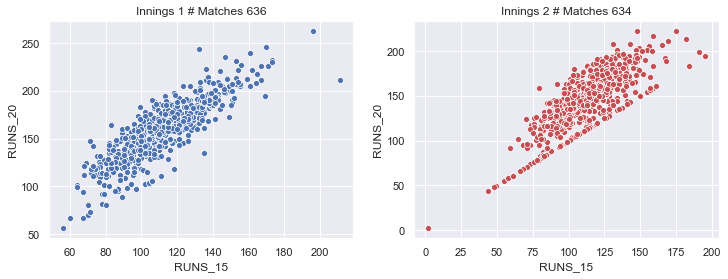

In [8]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax0=ax[0]
ax1=ax[1]

# all matches which have gone till 20th over 

cond = (matchdata['Ball_id_15']>=90 ) & (matchdata['Ball_id_20']>=115)
data = matchdata[cond]

data=matchdata[(matchdata['Innings_No']==1)]
no_of_innings = data.shape[0]

sns.scatterplot(x='RUNS_15',y='RUNS_20', data=matchdata[(matchdata['Innings_No']==1)],  ax=ax0)
ax0.set_title('Innings 1 # Matches '+str(no_of_innings))


data=matchdata[(matchdata['Innings_No']==2)]
no_of_innings = data.shape[0]

sns.scatterplot(x='RUNS_15',y='RUNS_20', data=matchdata[(matchdata['Innings_No']==2)], color='r', ax=ax1)
ax1.set_title('Innings 2 # Matches '+str(no_of_innings))

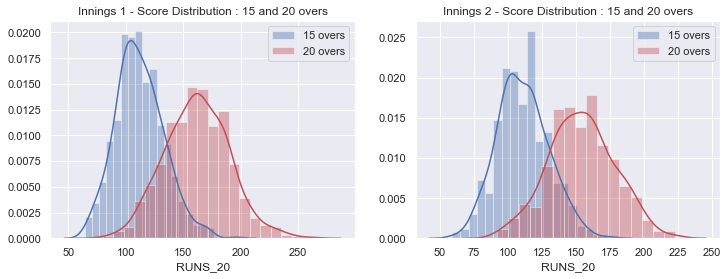

In [9]:
fig,ax=plt.subplots(1,2,figsize=(12,4))

cond = (matchdata['Innings_No']==1) & (matchdata['Ball_id_15']>=90 ) & (matchdata['Ball_id_20']>=115)
data=matchdata[cond]

sns.distplot(data['RUNS_15'], color='b', label='15 overs', ax=ax[0])

cond = (matchdata['Innings_No']==1) & (matchdata['Ball_id_15']>=90 ) & (matchdata['Ball_id_20']>=115)
sns.distplot(data['RUNS_20'], color='r', label='20 overs', ax=ax[0])
ax[0].set_title ('Innings 1 - Score Distribution : 15 and 20 overs')

ax[0].legend()

## Innings 2

cond = (matchdata['Innings_No']==2) & (matchdata['Ball_id_15']>=90 ) & (matchdata['Ball_id_20']>=115)
data=matchdata[cond]

sns.distplot(data['RUNS_15'], color='b', label='15 overs', ax=ax[1])

cond = (matchdata['Innings_No']==2) & (matchdata['Ball_id_15']>=90 ) & (matchdata['Ball_id_20']>=115)
sns.distplot(data['RUNS_20'], color='r', label='20 overs', ax=ax[1])
ax[1].legend()

ax[1].set_title ('Innings 2 - Score Distribution : 15 and 20 overs')

ax[0].legend()


plt.show()
#sns.barplot(data = data, y='RUNS_15', x='Innings_No',palette='Paired_r')

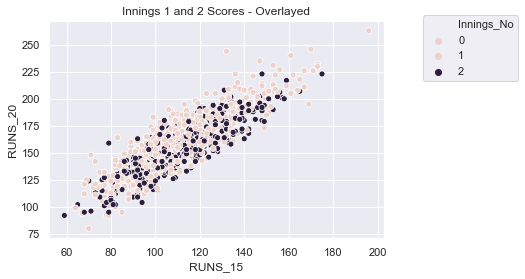

In [10]:
# Overlayed Scatter
cond = (matchdata['Innings_No']>=1) & (matchdata['Innings_No']<=2) & (matchdata['Ball_id_15']>=90 ) & (matchdata['Ball_id_20']>=115)
data = matchdata[cond]
sns.scatterplot(x='RUNS_15',y='RUNS_20', data=data, hue='Innings_No')
plt.title('Innings 1 and 2 Scores - Overlayed')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

### Check out the distribution of scores of  first Innings Only - Scatter Plot

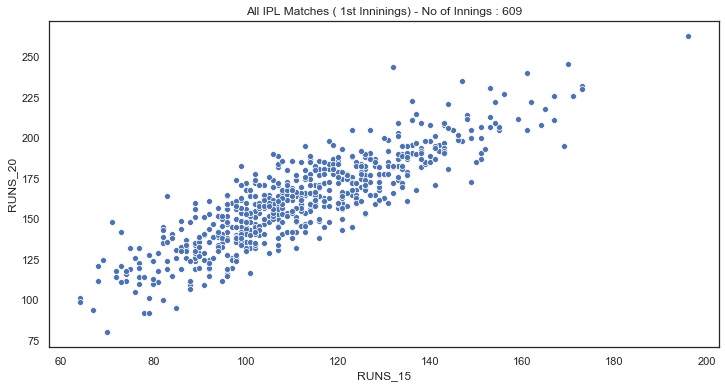

In [75]:
fig,ax=plt.subplots(figsize=(12,6))
sns.set_style('white')

cond = (matchdata['Innings_No']==1) &  (matchdata['Ball_id_15']>=90 ) & (matchdata['Ball_id_20']>=115)
data = matchdata[cond]


sns.scatterplot(x='RUNS_15',y='RUNS_20', data=data, ax=ax)
no_of_innings = data.shape[0]
ax.set(title ='All IPL Matches ( 1st Inninings) - No of Innings : '+str(no_of_innings))
plt.show()

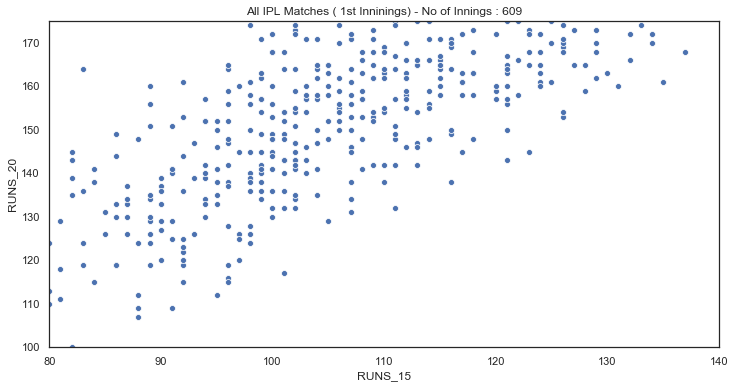

In [78]:
fig,ax=plt.subplots(figsize=(12,6))
sns.set_style('white')

cond = (matchdata['Innings_No']==1) &  (matchdata['Ball_id_15']>=90 ) & (matchdata['Ball_id_20']>=115)
data = matchdata[cond]


sns.scatterplot(x='RUNS_15',y='RUNS_20', data=data, ax=ax)
no_of_innings = data.shape[0]
ax.set(title ='All IPL Matches ( 1st Inninings) - No of Innings : '+str(no_of_innings))
plt.ylim(100,175)
plt.xlim(80,140)
plt.show()

### Check out the distribution of scores after 20 overs - Distribution Plot

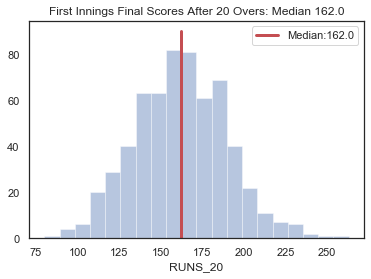

In [12]:
### Check out the distribution of scores - Scatter Plot

cond = (matchdata['Innings_No']==1) &  (matchdata['Ball_id_15']>=90 ) & (matchdata['Ball_id_20']>=115)
data = matchdata[cond]


sns.distplot(data['RUNS_20'], kde=False)

Avg=np.round(data['RUNS_20'].median(),2)

xp=[Avg]*10
yp=list(range(0,100,10))
plt.plot(xp, yp, linewidth=3, color='r', ls='-', label='Median:'+str(Avg))

plt.title('First Innings Final Scores After 20 Overs: Median ' +str(Avg))
plt.legend()
plt.show()


### Create a multiplier feature

In [13]:
matchdata['Mult']= matchdata ['RUNS_20']/matchdata['RUNS_15']

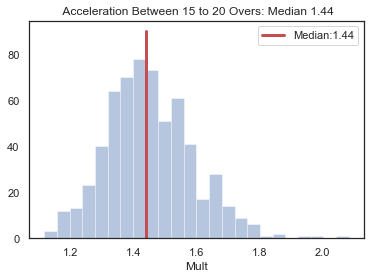

In [14]:
cond = (matchdata['Innings_No']==1) &  (matchdata['Ball_id_15']>=90 ) & (matchdata['Ball_id_20']>=115)
data = matchdata[cond]

sns.distplot(data['Mult'], kde=False)

Avg=np.round(data['Mult'].median(),2)

xp=[Avg]*10
yp=list(range(0,100,10))
plt.plot(xp, yp, linewidth=3, color='r', ls='-', label='Median:'+str(Avg))

plt.title(' Acceleration Between 15 to 20 Overs: Median ' +str(Avg))
plt.legend()
plt.show()

### Observation: Teams multiply their score by 1.2x to 1.8x with a median around 1.44x

##  Model 1:   Predict Score of Over 20 Based on Score of Over 15

In [15]:
### Data set head
cond = (matchdata['Innings_No']==1) & (matchdata['Ball_id_15']>=90 ) & (matchdata['Ball_id_20']>=120 )
matchdata[cond].head()

,MatcH_id,Innings_No,RUNS_15,Over_id_15,Ball_id_15,RUNS_20,Over_id_20,Ball_id_20,Mult
0,335987,1,154,15,94,222,20,124,1.441558
2,335988,1,161,15,94,240,20,124,1.490683
4,335989,1,92,15,92,125,20,122,1.358696
6,335990,1,105,15,92,165,20,123,1.571429
10,335992,1,115,15,91,166,20,122,1.443478


In [16]:
# Load X and y
cond = (matchdata['Innings_No']==1) & (matchdata['Ball_id_15']>=90 ) & (matchdata['Ball_id_20']>=120 )
# Load the features to a variable X
X = matchdata[cond][['RUNS_15']]

# Load the dependent variable to y
y = matchdata[cond]['RUNS_20']


In [17]:
y.head()

0     222
2     240
4     125
6     165
10    166
Name: RUNS_20, dtype: int64

In [18]:
X.shape, y.shape

((596, 1), (596,))

In [19]:
#Lets Build a Linear Model

In [20]:
from sklearn import linear_model

In [21]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

Wall time: 997 µs


In [22]:
X_train.shape, X_test.shape

((476, 1), (120, 1))

In [23]:
lr = linear_model.LinearRegression()

In [24]:
%%time
lr.fit(X_train,y_train)

Wall time: 2 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
lr.coef_ , lr.intercept_

(array([1.14819901]), 33.28907808476811)

In [26]:
runs=200
lr.predict([[runs]])[0]

262.92887939766393

In [27]:
predictions = lr.predict(X_test)

predictions[:5]

array([167.62836185, 156.14637179, 150.40537675, 161.88736682,
       182.55494894])

In [28]:
X_test[:5]

,RUNS_15
595,117
617,107
376,102
973,112
464,130


In [29]:
y_test[:5]

595    181
617    171
376    159
973    157
464    178
Name: RUNS_20, dtype: int64

In [30]:
predictions[:5]

array([167.62836185, 156.14637179, 150.40537675, 161.88736682,
       182.55494894])

In [31]:
from sklearn import linear_model
# Let's create an instance for the LinerRegression model


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

lr = linear_model.LinearRegression()

# Training the model on our train dataset
lr.fit(X_train,y_train)



# Getting predictions from the model 
#X_test=X_test.values.reshape(-1,1)

predictions = lr.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', metrics.r2_score(y_test, predictions))

MAE: 10.021428282606037
MSE: 158.9049875263315
RMSE: 12.60575216027713
R2: 0.7675683396787614


In [32]:
# What will be the predicted score at 100 runs in 15 overs?

runs=100
lr.predict([[runs]])[0]

148.10897874121602

In [33]:
## Plot the Model 

Text(0.5, 1.0, 'Linear Regression')

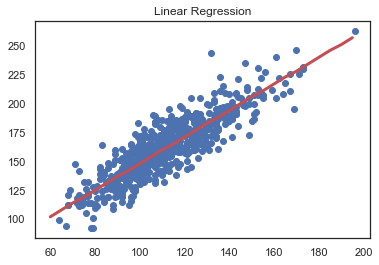

In [34]:
# do a prediction for 15th over score in a range of 60 to 200
xx=[]
yy=[]
for runs in range (60,200,5):
    scr = np.round(lr.predict([[runs]])[0])
    #print(runs, scr)
    xx.append(runs)
    yy.append(scr)
    
    
cond = (matchdata['Innings_No']==1) & (matchdata['Ball_id_15']>=90 ) & (matchdata['Ball_id_20']>=120 )
data = matchdata[cond]
# plot the actual 
plt.scatter(data['RUNS_15'],data['RUNS_20'])
plt.plot(xx, yy, c='r', lw=3)
plt.title('Linear Regression')

In [35]:
lr.intercept_ , lr.coef_[0]

(33.28907808476811, 1.1481990065644792)

In [36]:
pd.DataFrame({'Score_15':xx, 'Final Score':yy})[8:18]

,Score_15,Final Score
8,100,148.0
9,105,154.0
10,110,160.0
11,115,165.0
12,120,171.0
13,125,177.0
14,130,183.0
15,135,188.0
16,140,194.0
17,145,200.0


Text(0.5, 1.0, 'Predictions')

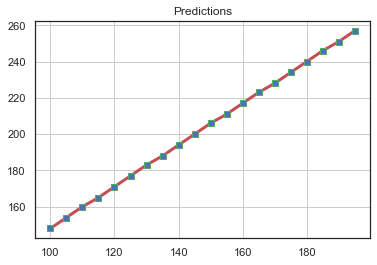

In [37]:
plt.plot(xx[8:], yy[8:], c='r', lw=3, marker='s', markeredgecolor ='g', markerfacecolor='b' )
plt.grid()
plt.title('Predictions')

### Try Multiple Algorithms for The Univariate Model

In [38]:
m1_regressors, m1_list = getRegressors()
scr, fitted, res = predictAll(m1_regressors, X_train, y_train, X_test,y_test,m1_list)


 Model LinearRegression
 Model RandomForestRegressor
 Model ExtraTreesRegressor
 Model GradientBoostingRegressor
 Model Lasso
 Model ElasticNet
 Model Ridge
 Model AdaBoostRegressor
 Model KNeighborsRegressor


In [39]:
sample_results = display_result_runs(fitted,m1_list)
sample_results

,Linear,RF,ExtraTrees,GradBoost,Lasso,E-net,Ridge,Adaboost,KNN
100,148.0,151.0,155.0,151.0,148.0,148.0,148.0,153.0,152.0
105,154.0,158.0,157.0,160.0,154.0,154.0,154.0,157.0,161.0
110,160.0,159.0,166.0,160.0,160.0,160.0,160.0,162.0,162.0
115,165.0,168.0,168.0,169.0,165.0,165.0,165.0,167.0,171.0
120,171.0,170.0,169.0,172.0,171.0,171.0,171.0,170.0,177.0
125,177.0,177.0,173.0,178.0,177.0,177.0,177.0,179.0,180.0
130,183.0,180.0,173.0,180.0,183.0,183.0,183.0,179.0,180.0
135,188.0,186.0,181.0,178.0,188.0,188.0,188.0,192.0,181.0
140,194.0,195.0,182.0,193.0,194.0,194.0,194.0,199.0,192.0


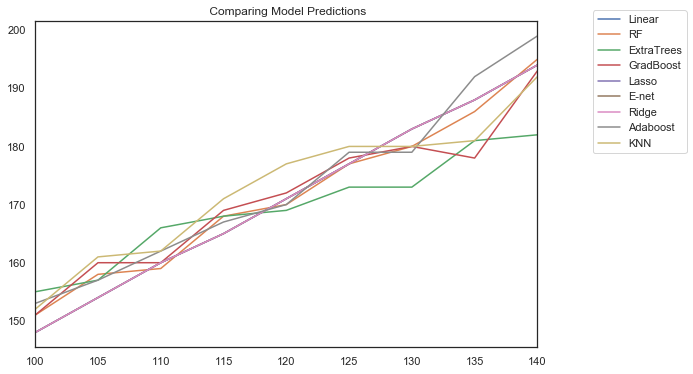

In [40]:
## Plot the different models
sample_results.plot(figsize=(9,6))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title(' Comparing Model Predictions')
plt.show()

In [41]:
# Compare results
res

,Model,RMS,R2,CV
4,Lasso,12.603240,0.767661,13.285190
5,ElasticNet,12.603240,0.767661,13.285196
0,LinearRegression,12.629001,0.766710,13.285101
6,Ridge,12.629001,0.766710,13.285101
1,RandomForestRegressor,12.716131,0.763480,13.772303
7,AdaBoostRegressor,13.379088,0.738175,14.003420
3,GradientBoostingRegressor,13.479923,0.734214,13.895930
8,KNeighborsRegressor,13.881943,0.718124,13.908962
2,ExtraTreesRegressor,14.593949,0.688467,17.330677


In [42]:
# Predicted Scores across models
scr.sample(5)

,Linear,RF,ExtraTrees,GradBoost,Lasso,E-net,Ridge,Adaboost,KNN
53,228.0,218.0,200.0,226.0,228.0,228.0,228.0,216.0,222.0
27,140.0,136.0,145.0,139.0,140.0,140.0,140.0,135.0,134.0
66,196.0,195.0,183.0,193.0,196.0,196.0,196.0,199.0,192.0
99,164.0,168.0,167.0,169.0,164.0,164.0,164.0,167.0,172.0
36,141.0,138.0,148.0,141.0,141.0,141.0,141.0,135.0,143.0


### This model is oversimplified - doesn't take into account the wickets !

# Model 2  - Score along with Wickets Remaining

### Load the runs and wickets data

In [43]:
matchdata=pd.read_csv('/Data/IPL.csv', index_col=0)
# Ignore super overs

matchdata = matchdata [ (matchdata['Innings_No']==1)  | (matchdata['Innings_No']==2) ]

In [44]:
matchdata.head()

,MatcH_id,Innings_No,RUNS_15,Over_id_15,Bowler_Wicket_15,Ball_id_15,RUNS_20,Over_id_20,Bowler_Wicket_20,Ball_id_20
0,335987,1,154,15,2,94,222,20,3,124
1,335987,2,81,15,8,99,82,16,9,101
2,335988,1,161,15,4,94,240,20,5,124
3,335988,2,165,15,3,94,207,20,4,124
4,335989,1,92,15,5,92,125,20,6,122


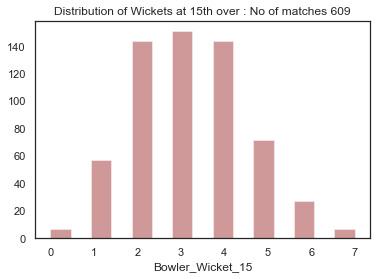

In [45]:
### How many wickets fall by 15th over?
cond = (matchdata['Innings_No']==1 ) & (matchdata['Ball_id_15']>=90 ) & (matchdata['Ball_id_20']>=115 )
data = matchdata[cond]

sns.distplot(data['Bowler_Wicket_15'], kde=False, color='darkred')
plt.title('Distribution of Wickets at 15th over : No of matches '+str(data.shape[0]))
plt.show()

### Create a multiplier feature

In [46]:
matchdata['Mult']= matchdata ['RUNS_20']/matchdata['RUNS_15']

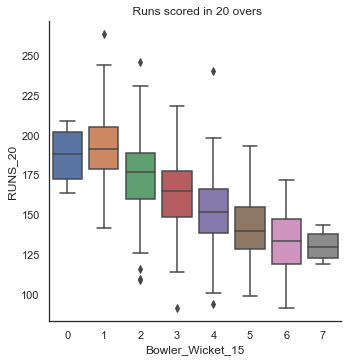

In [47]:
## Display Avg  Runs_20  at each wicket level
cond = (matchdata['Innings_No']==1 ) & (matchdata['Ball_id_15']>=90 ) & (matchdata['Ball_id_20']>=120 )

data = matchdata[cond]
g=sns.catplot(data=data,kind = 'box',x='Bowler_Wicket_15',y='RUNS_20')
plt.title(' Runs scored in 20 overs')

#(g.set_axis_labels("", "Survival Rate")
plt.show()

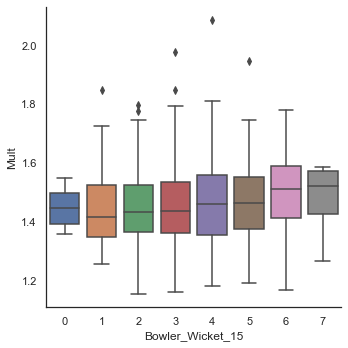

In [48]:
## Display Avg  Multiplier  at each wicket level
cond = (matchdata['Innings_No']==1 ) & (matchdata['Ball_id_15']>=90 ) & (matchdata['Ball_id_20']>=120 )

data = matchdata[cond]
sns.catplot(data=data,kind = 'box',x='Bowler_Wicket_15',y='Mult')

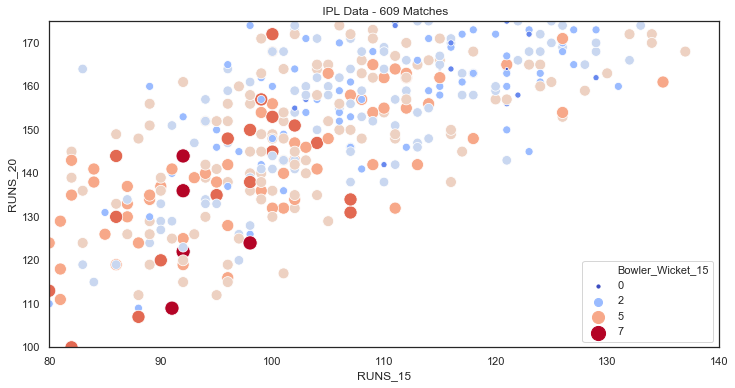

In [81]:
fig,ax=plt.subplots(figsize=(12,6))
cond = (matchdata['Innings_No']==1 ) & (matchdata['Ball_id_15']>=90 ) & (matchdata['Ball_id_20']>=115 )

data = matchdata[cond]
sns.scatterplot(data=data,x='RUNS_15',y='RUNS_20', hue='Bowler_Wicket_15',size='Bowler_Wicket_15',
               sizes=(10,200),  ax=ax, palette='coolwarm')

plt.ylim(100,175)
plt.xlim(80,140)
plt.title(' IPL Data - 609 Matches')
plt.show()

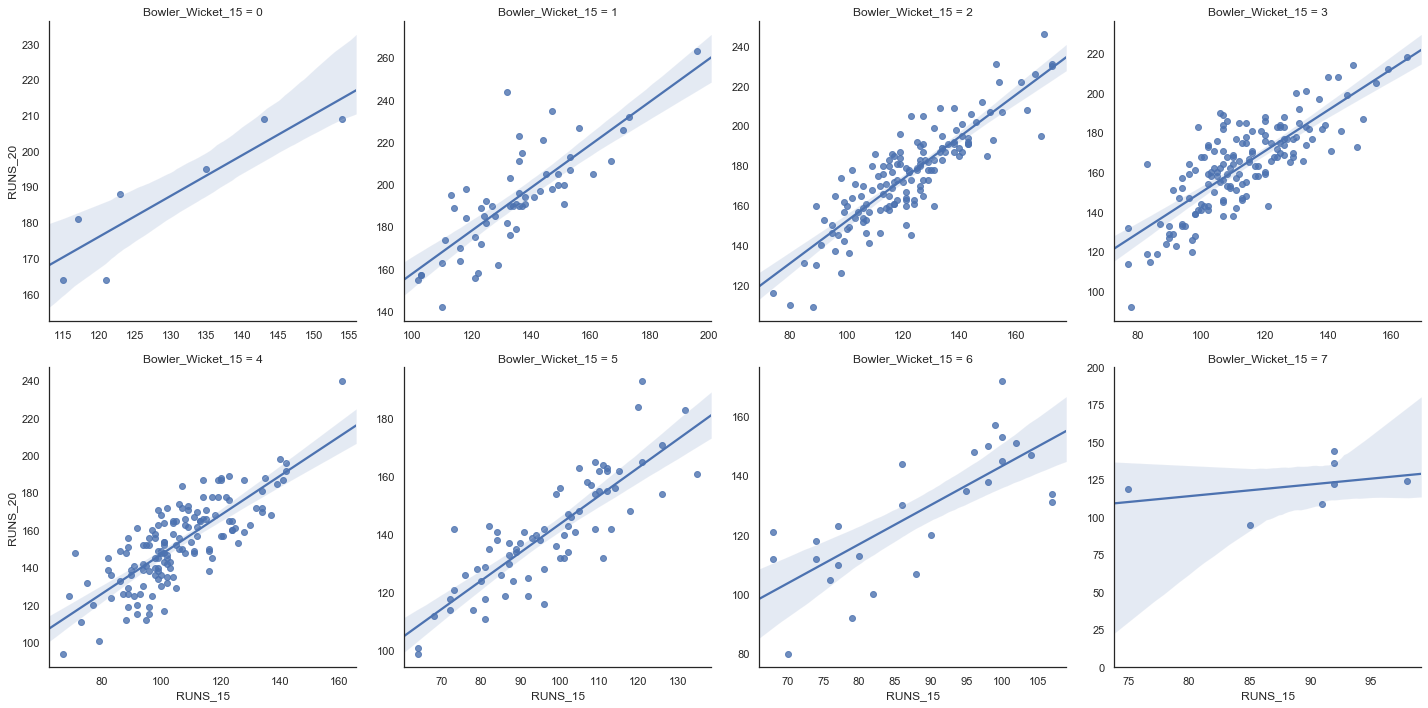

In [55]:
## Scatter Diag per wicket

cond = (matchdata['Innings_No']==1 ) & (matchdata['Ball_id_15']>=90 ) & (matchdata['Ball_id_20']>=115 )

data = matchdata[cond]
sns.lmplot(data=data,x='RUNS_15',y='RUNS_20', col='Bowler_Wicket_15', col_wrap=4 , palette='Blues', sharex=False, sharey=False)
plt.ylim(0,200)
plt.show()

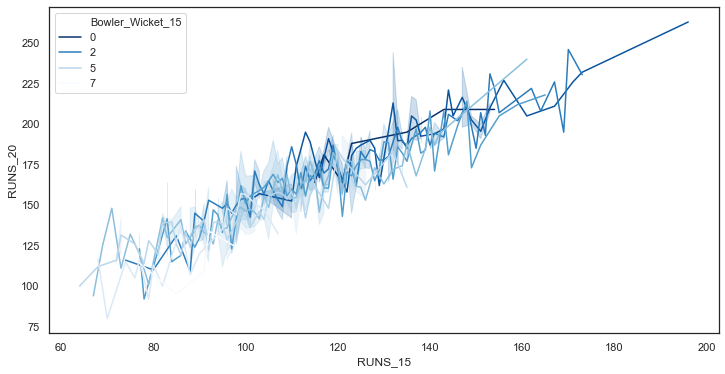

In [57]:
data = matchdata[cond]
fig,ax=plt.subplots(figsize=(12,6))
sns.lineplot(x='RUNS_15',y='RUNS_20', hue='Bowler_Wicket_15', data=data, ax=ax, palette='Blues_r')

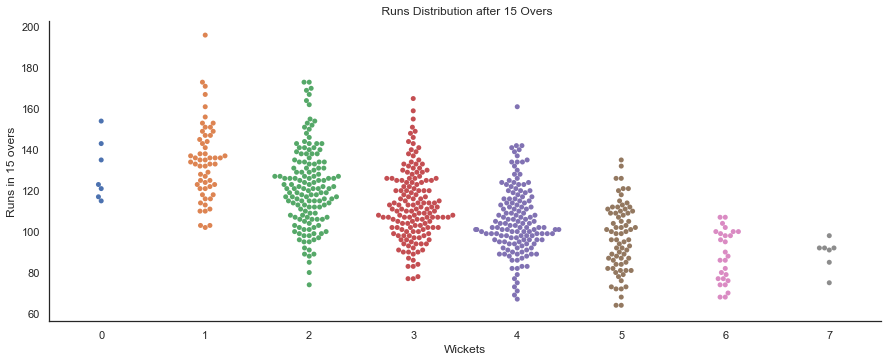

In [52]:
ax=sns.catplot(y='RUNS_15', x='Bowler_Wicket_15', data=data, kind='swarm',aspect=2.5, 
            label='Runs after 15 overs', legend=True)
ax.set(title=' Runs Distribution after 15 Overs', xlabel='Wickets', ylabel='Runs in 15 overs')
plt.show()

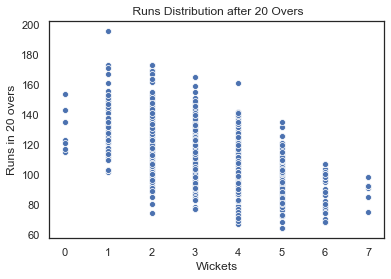

In [74]:
ax=sns.scatterplot(y='RUNS_15', x='Bowler_Wicket_15', data=data)
ax.set(title=' Runs Distribution after 20 Overs', xlabel='Wickets', ylabel='Runs in 20 overs')
plt.show()

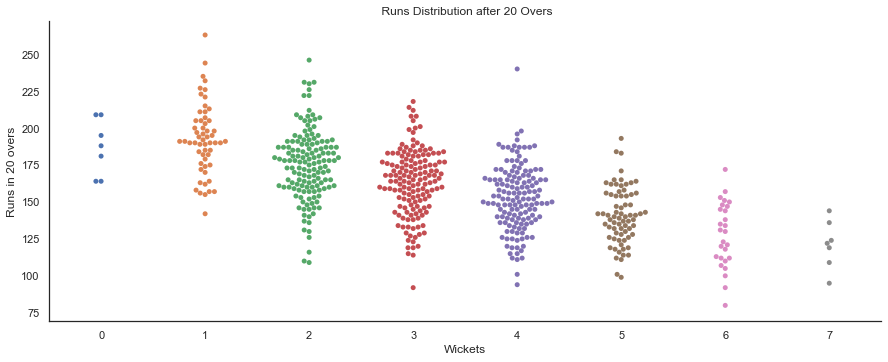

In [70]:
ax=sns.catplot(y='RUNS_20', x='Bowler_Wicket_15', data=data, kind='swarm',aspect=2.5, 
            label='Runs after 20 overs', legend=True)
ax.set(title=' Runs Distribution after 20 Overs', xlabel='Wickets', ylabel='Runs in 20 overs')
plt.show()

In [59]:
matchdata['multiplier']=np.round(matchdata['RUNS_20']/matchdata['RUNS_15']-1,1)

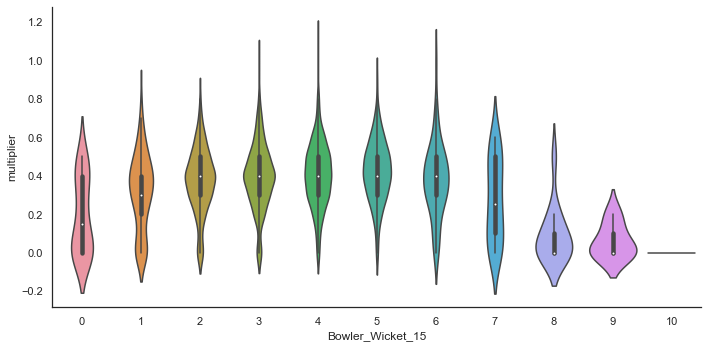

In [60]:
ax=sns.catplot(x='Bowler_Wicket_15', y='multiplier', data=matchdata, kind='violin', aspect=2)
plt.show()

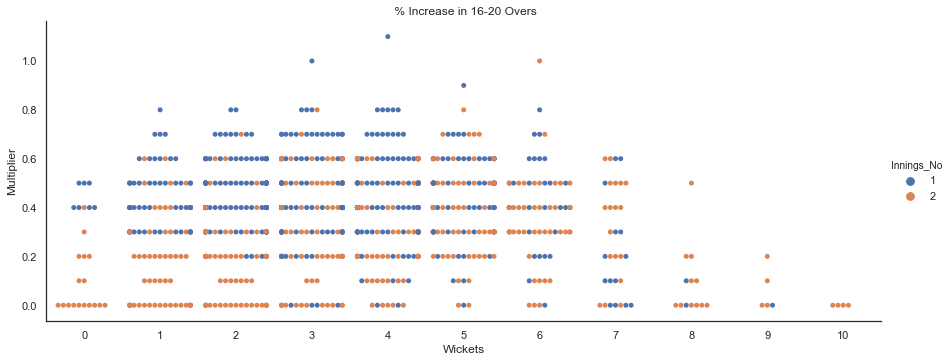

In [61]:
ax=sns.catplot(y='multiplier', x='Bowler_Wicket_15', data=matchdata, kind='swarm',aspect=2.5, 
            hue='Innings_No')
ax.set(title=' % Increase in 16-20 Overs', xlabel='Wickets', ylabel='Multiplier')
plt.show()

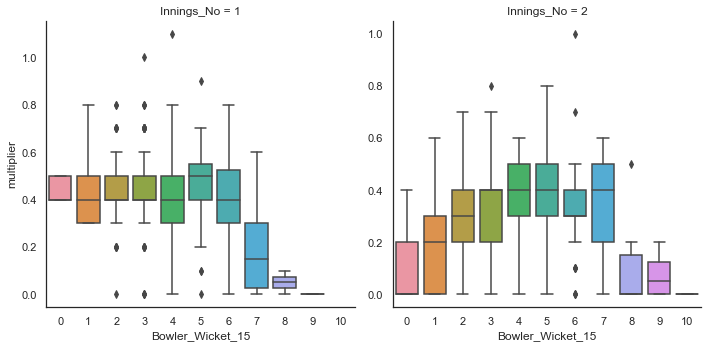

In [62]:
ax=sns.catplot(y='multiplier', x='Bowler_Wicket_15',  kind='box', col='Innings_No', data = matchdata,
              sharey=False)
#ax.set_xticklabels(labels=[50,100,150,200])
#ax.set(title=' Runs Distribution after 20 Overs', xlabel='Runs in 15 Overs', ylabel='Runs in 20 overs')
plt.show()

### EDA Observations:

For Innings 2 multipliers are really low for wicket 0/1 - this could mean that if the run chase goes well in the first 15 overs, with few wickets lost, the sense of urgency is lost as they just need to win

Hence the first innings data is better for estimating 20th over score from 15th over score





### Model 2 : Set up X and Y variables

Text(0.5, 0.92, 'Final Score vs 15th over score')

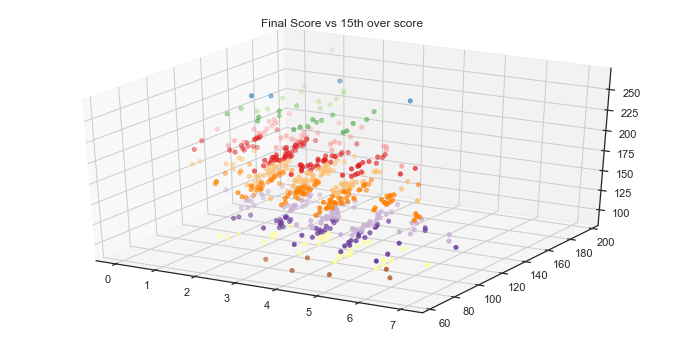

In [63]:
# Data for a three-dimensional line
cond = (matchdata['Innings_No']==1) & (matchdata['Ball_id_15']>=90 ) & (matchdata['Ball_id_20']>=120 )
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection='3d')

xdata = matchdata[cond]['Bowler_Wicket_15']

ydata = matchdata[cond]['RUNS_15']
zdata = matchdata[cond]['RUNS_20']
ax.scatter(xdata, ydata, zdata, c=zdata, cmap='Paired_r', linewidth=0.5);
plt.title('Final Score vs 15th over score')


In [64]:
cond = (matchdata['Innings_No']==1) & (matchdata['Ball_id_15']>=90 ) & (matchdata['Ball_id_20']>=120 )
# Load the features to a variable X
X = matchdata[cond][['Bowler_Wicket_15', 'RUNS_15']]

# Load the dependent variable to y
y = matchdata[cond]['RUNS_20']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Some models need scaled data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled = scaler.fit(X)
X_train_s=scaler.transform(X_train)
X_test_s=scaler.transform(X_test)


In [65]:
matchdata[cond][['Bowler_Wicket_15', 'RUNS_15','RUNS_20']].head()

,Bowler_Wicket_15,RUNS_15,RUNS_20
0,2,154,222
2,4,161,240
4,5,92,125
6,2,105,165
10,4,115,166


In [66]:
#X_test.head()
X.shape

(596, 2)

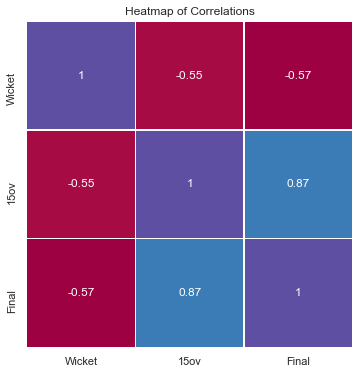

In [67]:
fig,ax = plt.subplots(figsize=(9,6))
hdf=matchdata[cond][['Bowler_Wicket_15', 'RUNS_15','RUNS_20']]
hdf.columns=['Wicket','15ov','Final']
sns.heatmap(data=hdf.corr(), cmap='Spectral',annot=True,ax=ax, square=True, linewidths=.5, cbar=False)

plt.title("Heatmap of Correlations")
plt.show()

In [68]:
hdf.corr()

,Wicket,15ov,Final
Wicket,1.000000,-0.547694,-0.573517
15ov,-0.547694,1.000000,0.873734
Final,-0.573517,0.873734,1.000000


In [69]:
#Linear Model
from sklearn import linear_model
# Let's create an instance for the LinerRegression model
lr = linear_model.LinearRegression()

# Training the model on our train dataset
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:',metrics.r2_score(y_test, predictions))

MAE: 9.613693152046759
MSE: 147.5340525836981
RMSE: 12.146359643271646
R2: 0.7842007017541375


In [ ]:
def display_result(model):
    table =[]

    for score in range(100,150,5):
        l=[score]
        for wicket in range(1,10):
            p= model.predict(np.array([[wicket, score]]))
            #print(wicket,score,round(p[0]))
            l.append(round(p[0]))
        table.append(l)
    result = pd.DataFrame(table, columns=['SCORE','1','2','3','4','5','6','7','8','9'])
    return result
        

In [ ]:
display_result(lr)

In [ ]:
sg =SGDRegressor( max_iter=5 , tol=None)
# Training the model on our train dataset
#Use scaled values
sg.fit(X_train_s,y_train)
predictions = sg.predict(X_test_s)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:',metrics.r2_score(y_test, predictions))


In [ ]:
rf=RandomForestRegressor(max_depth=3, random_state=1, min_samples_leaf=10, min_samples_split=10)

# Training the model on our train dataset
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:',metrics.r2_score(y_test, predictions))


In [ ]:
svr=SVR(C=100)

svr.fit(X_train_s,y_train)
predictions = svr.predict(X_test_s)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:',metrics.r2_score(y_test, predictions))


In [ ]:
model = KNeighborsRegressor(n_neighbors=10)

# Training the model on our train dataset
model.fit(X_train,y_train)
predictions = model.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:',metrics.r2_score(y_test, predictions))


In [ ]:
display_result(model)

### Polynomial Reg 

In [ ]:
X_train.shape

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
lrpoly = LinearRegression(fit_intercept=False)
lrpoly.fit(X_train_poly,y_train)
p = lrpoly.predict(X_test_poly)


print('MAE:', metrics.mean_absolute_error(y_test, p))
print('MSE:', metrics.mean_squared_error(y_test, p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, p)))
print('R2:',metrics.r2_score(y_test, p))
table =[]

for score in range(100,150,5):
    l=[score]
    for wicket in range(1,10):
        polyX= poly.fit_transform ( np.array([[wicket, score]]))
        p= lrpoly.predict(polyX)
        #print(wicket,score,round(p[0]))
        l.append(round(p[0]))
    table.append(l)

result = pd.DataFrame(table, columns=['SCORE','1','2','3','4','5','6','7','8','9'])
result

In [ ]:
## Build multiple models
from keras import models
from keras import layers

def predictANN(X,y):


    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    model = models.Sequential()
    model.add(layers.Dense(596, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(20, activation='relu'))
   # model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
    
    model.fit(X_train, y_train, epochs=80, batch_size=16, verbose=0)
    
    predictions = model.predict(X_test)
    
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('R-squared' , metrics.r2_score(y_test, predictions))
    
    return


def predictAll_model2(Regressors, X_train, y_train, X_test,y_test,RegList):

    predictions=[]
    cvscores=[]
    models =[]
    fitted_model=[]
    y_train= y_train.ravel()
    for regressor in Regressors:
        model_name = type(regressor).__name__
        models.append(model_name)
        print(' Model', model_name)
        regressor.fit(X_train,y_train)
        fitted_model.append(regressor)
        prediction = regressor.predict(X_test)
        predictions.append(np.round(prediction))

        score = cross_val_score(regressor,X_train, y_train,cv=5,scoring="neg_mean_squared_error")
        meanscore=score.mean()
        cvscores.append(np.sqrt(-meanscore))
        #print('CV Score',score,meanscore, np.sqrt(-meanscore))
    
    RMS=[]
    R2=[]
    
    i=0
    for prediction in predictions:
        msscore = mean_squared_error(y_test, prediction)
        r2=r2_score(y_test, prediction)
        rms = sqrt(msscore)
        RMS.append(rms)
        R2.append(r2)
       
        i=i+1



    compare = pd.DataFrame(list(zip(models,RMS,R2,cvscores)), columns=['Model','RMS','R2','CV'])
    return fitted_model, compare.sort_values(by='RMS')



In [ ]:
X.shape, y.shape

In [ ]:
predictANN(X,y)

In [ ]:
m2_reg, m2_list = getRegressors()

In [ ]:
fitted_2, res_2=predictAll_model2(m2_reg, X_train, y_train, X_test,y_test,m2_list)

In [ ]:
res_2

In [ ]:
#Linear
display_result(fitted_2[0])

In [ ]:
#KNN
display_result(fitted_2[8])

### Observations of Model 2 Performance

1. KNN - Since we do not have enough data esp for wickets 8 or 9 , KNN is giving over-optimistic results 
2. The penalty for losing wickets is best  captured by Polynomial Model but it is not very different from the linear model at low scores ( 100/9  goes to 134/135  but 145/9 goes to 177/181 )


## Model 3 : Add a Feature - Wicket Squared is added for all Models (giving benefit of Polynomial nature to all models)

In [ ]:
cond = (matchdata['Innings_No']==1) & (matchdata['Ball_id_15']>=90 ) & (matchdata['Ball_id_20']>=120 )
# Load the features to a variable X
X1 = matchdata[cond][['Bowler_Wicket_15', 'RUNS_15']]

# Load the dependent variable to y
y = matchdata[cond]['RUNS_20']
X1['Bowler_Wicket_15_Sq']=X1['Bowler_Wicket_15']*X1['Bowler_Wicket_15']
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.20, random_state=1)

# Some models need scaled data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X1)
X_train_s=scaler.transform(X_train)
X_test_s=scaler.transform(X_test)

In [ ]:
# Let's create an instance for the LinerRegression model
lr = linear_model.LinearRegression()

# Training the model on our train dataset
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', metrics.r2_score(y_test, predictions))


In [ ]:
def display_result_wktsq(model):
    table =[]

    for score in range(100,150,5):
        l=[score]
        for wicket in range(1,10):
            p= model.predict(np.array([[wicket, score, wicket*wicket]]))
            #print(wicket,score,round(p[0]))
            l.append(round(p[0]))
        table.append(l)

    result = pd.DataFrame(table, columns=['SCORE','1','2','3','4','5','6','7','8','9'])
    return result


In [ ]:
display_result_wktsq(lr)

In [ ]:
# Try KNN


model = KNeighborsRegressor(n_neighbors=10)

# Training the model on our train dataset
model.fit(X_train,y_train)
predictions = model.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', metrics.r2_score(y_test, predictions))

In [ ]:
display_result_wktsq(model)

In [ ]:
# Build Multiple Models for Model 3

In [ ]:
fitted_3, res_3=predictAll_model2(m2_reg, X_train, y_train, X_test,y_test,m2_list)

In [ ]:
res_3

In [ ]:
#Elastic 
display_result_wktsq(fitted_3[5])

In [ ]:
#KNN
display_result_wktsq(fitted_3[8])

### Observations of Model3 

The penalty for losing wickets is better captured by Model 3

In Elastic Net, 100/9 after 15 overs is going to 126 in 20 overs; 145/9 is going to 174



### Conclusion :

####  1. The IPL games have few data points where games have gone to 20 overs completion after 8 or 9 wickets have fallen in 15 overs - so the models are not able to capture this scenario

#### 2.  The acceleration of scores from the 15th to 20th over highly  depends on the playing conditions and this model doesn't capture the same


### Additional Work

In [ ]:
### Tuning RF

In [ ]:
%%time
param_grid = {  
              "max_depth" : [ 3,  2],
              "min_samples_leaf" : [ 5,  10, 20], 
              "min_samples_split" : [  10,  15], 
              "n_estimators": [100, 50,  10],
              "max_features" : ["auto", "sqrt"]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestRegressor()

gsRF = GridSearchCV(rf,param_grid = param_grid, cv=5, scoring="explained_variance", n_jobs= 4, verbose = 1)

gsRF.fit(X, y)        

rf_best = gsRF.best_estimator_

print(gsRF.best_params_)

In [ ]:
print(gsRF.best_params_)

In [ ]:
#Random
display_result_wktsq(Regressors[1])